In [1]:
import pandas as pd
import numpy as np

In [2]:
obj=pd.Series([4,7,-5,3])
obj

0    4
1    7
2   -5
3    3
dtype: int64

In [3]:
print(obj.values) #获取值obj
print(obj.index)  #获取索引

[ 4  7 -5  3]
RangeIndex(start=0, stop=4, step=1)


---

In [4]:
obj2=pd.Series([4,7,-5,3],index=['d','b','a','c'])
obj2

d    4
b    7
a   -5
c    3
dtype: int64

In [5]:
obj2.index

Index(['d', 'b', 'a', 'c'], dtype='object')

---

In [6]:
obj2['a']  #使用数据标签进行索引取值

-5

In [7]:
obj2['d']=6 #修改值
obj2

d    6
b    7
a   -5
c    3
dtype: int64

In [8]:
obj2[['c','a','b']]   #使用字符串作为索引列表

c    3
a   -5
b    7
dtype: int64

In [9]:
obj2[[1,3]]     #按索引取行

b    7
c    3
dtype: int64

In [10]:
obj2['b':'c'] #利用标签的切片运算与普通的python切片运算不同，其末端是包含的

b    7
a   -5
c    3
dtype: int64

In [11]:
obj2[obj2>0]   #过滤出正的值

d    6
b    7
c    3
dtype: int64

In [12]:
obj2*2   #值乘2

d    12
b    14
a   -10
c     6
dtype: int64

In [13]:
np.exp(obj2)  #做指数运算

d     403.428793
b    1096.633158
a       0.006738
c      20.085537
dtype: float64

In [14]:
'b' in obj2 #判断成员资格，若真返回True，若不在，则返回Flase

True

# 字典也可以创建Series

In [15]:
sdata={'A':35000,'B':71000,'C':16000,'D':5000}
obj3=pd.Series(sdata)
obj3

A    35000
B    71000
C    16000
D     5000
dtype: int64

In [16]:
states=['E','A','C','B']
obj4=pd.Series(sdata,index=states) #这里的索引index是事先规定好的顺序
obj4

E        NaN
A    35000.0
C    16000.0
B    71000.0
dtype: float64

In [17]:
pd.isnull(obj4) #检测是否由缺失值

E     True
A    False
C    False
B    False
dtype: bool

In [18]:
obj4.isnull()  #另一种写法

E     True
A    False
C    False
B    False
dtype: bool

In [19]:
pd.notnull(obj4)  #是否不存在缺失值

E    False
A     True
C     True
B     True
dtype: bool

---

In [20]:
obj3

A    35000
B    71000
C    16000
D     5000
dtype: int64

In [21]:
obj4

E        NaN
A    35000.0
C    16000.0
B    71000.0
dtype: float64

In [22]:
obj3+obj4  #相加操作，一方不存在则为NaN

A     70000.0
B    142000.0
C     32000.0
D         NaN
E         NaN
dtype: float64

# Series对象自身和其索引都有name属性，这个特性与Pandas其他重要功能集成在一起；Series对象的name属性能够对当前对象进行描述；Series对象索引的name属性可以为标签索引进行注释，或者可以理解为标签索引的“名称”：

In [23]:
obj4.name='population' #Series本身有个name属性，这里的name指的是值的名称

In [24]:
obj4.index.name='state' #Series的索引也由name属性

In [25]:
obj4

state
E        NaN
A    35000.0
C    16000.0
B    71000.0
Name: population, dtype: float64

In [26]:
s1=pd.Series([1,2,3,4],index=["大一",'大二',"大三",'大四'])
s1

大一    1
大二    2
大三    3
大四    4
dtype: int64

In [27]:
s2=pd.Series([10,20,30,40],index=["大一",'大二',"大三",'大四'])
s2

大一    10
大二    20
大三    30
大四    40
dtype: int64

In [28]:
pd.concat([s1,s2],axis=0) #纵向合并

大一     1
大二     2
大三     3
大四     4
大一    10
大二    20
大三    30
大四    40
dtype: int64

In [29]:
pd.concat([s1,s2],axis=1) #横向合并

,0,1
大一,1,10
大二,2,20
大三,3,30
大四,4,40


# DataFrame

In [30]:
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'], 
        'year': [2000, 2001, 2002, 2001, 2002, 2003], 
        'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}
frame = pd.DataFrame(data)#创建一个数据框 frame
frame

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


In [31]:
frame.head() #查看前五行

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9


In [32]:
frame2 = pd.DataFrame(data, columns=['year', 'state', 'pop', 'debt'], 
                      index=['one', 'two', 'three', 'four', 'five', 'six'])
frame2#如果传入的列在数据中找不到，就会产生 NA值 如这里的 debt 列

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,NaN
five,2002,Nevada,2.9,NaN
six,2003,Nevada,3.2,NaN


In [33]:
frame2.columns #查看列名

Index(['year', 'state', 'pop', 'debt'], dtype='object')

In [34]:
frame2['state'] #指定获取列，即获取一个Series

one        Ohio
two        Ohio
three      Ohio
four     Nevada
five     Nevada
six      Nevada
Name: state, dtype: object

In [35]:
frame2.loc['three'] #通过索引名称取行

year     2002
state    Ohio
pop       3.6
debt      NaN
Name: three, dtype: object

In [36]:
frame2['debt']=16.5 #广播赋值
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,16.5
two,2001,Ohio,1.7,16.5
three,2002,Ohio,3.6,16.5
four,2001,Nevada,2.4,16.5
five,2002,Nevada,2.9,16.5
six,2003,Nevada,3.2,16.5


In [37]:
frame2['debt']=np.arange(6.) #重新赋值
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,0.0
two,2001,Ohio,1.7,1.0
three,2002,Ohio,3.6,2.0
four,2001,Nevada,2.4,3.0
five,2002,Nevada,2.9,4.0
six,2003,Nevada,3.2,5.0


# 当将列表或数组赋值给一个列时，值的长度必须和 DataFrame 的长度相匹配，如果将 series 赋 给一列时，series 的索引将会按照 DataFrame 的索引重新排列，并在空缺的地方填充缺失值。r 如 果被赋值的列并不窜仔，则会生成一个新的列

In [38]:
val=pd.Series([-1.2,-1.5,-1.7],index=['two','four','five'])
frame2['debt']=val #通过索引对应赋值，没有的使用NaN填充
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,-1.2
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,-1.5
five,2002,Nevada,2.9,-1.7
six,2003,Nevada,3.2,NaN


In [39]:
frame2['eastern']=frame2.state=='Ohio' #根据判断产生新的列
frame2 #增加了一列，这列是布尔值，判断条件是state是否为'ohio

,year,state,pop,debt,eastern
one,2000,Ohio,1.5,NaN,True
two,2001,Ohio,1.7,-1.2,True
three,2002,Ohio,3.6,NaN,True
four,2001,Nevada,2.4,-1.5,False
five,2002,Nevada,2.9,-1.7,False
six,2003,Nevada,3.2,NaN,False


# 可以使用del在DataFrame中删除列

In [40]:
del frame2['eastern'] #删除”eastern“列
frame2.columns #显示列名，发现已经没有”eastern“列

Index(['year', 'state', 'pop', 'debt'], dtype='object')

In [41]:
pop = {'Nevada': {2001: 2.4, 2002: 2.9}, 
       'Ohio': {2000: 1.5, 2001: 1.7, 2002: 3.6}}
frame3 = pd.DataFrame(pop)
frame3

,Nevada,Ohio
2000,NaN,1.5
2001,2.4,1.7
2002,2.9,3.6


In [42]:
frame3.T

,2000,2001,2002
Nevada,NaN,2.4,2.9
Ohio,1.5,1.7,3.6


# 如果 DataFrame 的索引和列拥有 name 属性，则这些 name 属性也会被显示

In [43]:
frame3.index.name='year'
frame3.columns.name='state'
frame3

state,Nevada,Ohio
year,,
2000,NaN,1.5
2001,2.4,1.7
2002,2.9,3.6


In [44]:
frame3.values #和 series 类似，DataFrame 的 values 属性会将包含在 DataFrame 中的数据以二维 ndarray 的形式返回

array([[nan, 1.5],
       [2.4, 1.7],
       [2.9, 3.6]])

In [45]:
numframe=np.random.randn(10,5) #生成10行5列的随机数
framenum=pd.DataFrame(numframe)
framenum.head()

,0,1,2,3,4
0,-0.909658,-1.283291,0.274672,0.000675,0.804377
1,0.129166,0.636401,-0.068133,0.319999,-0.837675
2,0.817424,-1.905697,0.159390,1.575691,0.918002
3,1.051945,1.151795,0.098921,0.753985,-0.338115
4,-0.169813,-0.270480,0.435749,-0.086310,0.608928


In [46]:
framenum.info() #info属性表示打印数据库的属性信息

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
0    10 non-null float64
1    10 non-null float64
2    10 non-null float64
3    10 non-null float64
4    10 non-null float64
dtypes: float64(5)
memory usage: 480.0 bytes


# 直接读入csv文件或者Excel文件构造DataFrame

In [47]:
data1=pd.read_csv('data.csv',header=None,names=['name','sex','age'])
#header=None 表示不会自动把数据的第1行和第1列设置成行、列索引
#names表示指定列索引，通常意义下的变量名
data1

,name,sex,age
0,1,2,3
1,4,5,6
2,7,8,9


# 对于顺序数据，比如时间序列，在重建索引时，可能会需要进行插值或填值。method 可以选参 数允许我们使用诸如 fill 等方法在重建索引时插值，ffill 方法会用值的前项进行填充

In [48]:
obj3=pd.Series(['blue','purple','yellow'],index=[0,2,4])
obj3

0      blue
2    purple
4    yellow
dtype: object

In [49]:
obj3.reindex(range(6),method='ffill') #fill方法将前项的值填充在这里

0      blue
1      blue
2    purple
3    purple
4    yellow
5    yellow
dtype: object

In [50]:
frame = pd.DataFrame(np.arange(9).reshape((3,3)),
                     index=['a', 'c', 'd'], 
                     columns=['Ohio', 'Texas', 'California'])
frame

,Ohio,Texas,California
a,0,1,2
c,3,4,5
d,6,7,8


In [51]:
frame2 = frame.reindex(['a', 'b', 'c', 'd'])
frame2

,Ohio,Texas,California
a,0.0,1.0,2.0
b,NaN,NaN,NaN
c,3.0,4.0,5.0
d,6.0,7.0,8.0


# 列可以使用 colmumn 关键字重建索引.

In [52]:
states = ['Texas', 'Utah', 'California']
frame.reindex(columns=states)

,Texas,Utah,California
a,1,NaN,2
c,4,NaN,5
d,7,NaN,8


In [53]:
frame.loc[['a','b','c','d'],states]

D:\Anaconda\Anaconda\lib\site-packages\pandas\core\indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


,Texas,Utah,California
a,1.0,NaN,2.0
b,NaN,NaN,NaN
c,4.0,NaN,5.0
d,7.0,NaN,8.0


In [54]:
obj = pd.Series(np.arange(5.), index=['a', 'b', 'c', 'd', 'e'])
new_obj=obj.drop('c') #删除索引为c的行
new_obj

a    0.0
b    1.0
d    3.0
e    4.0
dtype: float64

In [55]:
obj.drop(['d','c']) #删除多行

a    0.0
b    1.0
e    4.0
dtype: float64

In [56]:
data = pd.DataFrame(np.arange(16).reshape((4, 4)), 
                    index=['Ohio', 'Colorado', 'Utah', 'New York'], 
                    columns=['one', 'two', 'three', 'four'])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [57]:
data.drop('two', axis=1)#axis=1 表示列，这里是删除列

,one,three,four
Ohio,0,2,3
Colorado,4,6,7
Utah,8,10,11
New York,12,14,15


In [58]:
data.drop(['two', 'four'], axis='columns') #根据列名删除多列

,one,three
Ohio,0,2
Colorado,4,6
Utah,8,10
New York,12,14


In [59]:
data = pd.DataFrame(np.arange(16).reshape((4, 4)), 
                    index=['Ohio', 'Colorado', 'Utah', 'New York'], 
                    columns=['one', 'two', 'three', 'four'])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [60]:
data < 5  #判断 返回布尔数组

,one,two,three,four
Ohio,True,True,True,True
Colorado,True,False,False,False
Utah,False,False,False,False
New York,False,False,False,False


In [61]:
data[data['three'] > 5] #筛选数据 筛选的是行

,one,two,three,four
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


---

In [62]:
data = pd.DataFrame(np.arange(16).reshape((4, 4)), 
                    index=['Ohio', 'Colorado', 'Utah', 'New York'],
                    columns=['one', 'two', 'three', 'four'])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [63]:
data.loc['Colorado', ['two', 'three']] #选择一行和多列

two      5
three    6
Name: Colorado, dtype: int32

In [64]:
data.iloc[2] #选择一行

one       8
two       9
three    10
four     11
Name: Utah, dtype: int32

In [65]:
data.iloc[[1, 2], [3, 0, 1]] #选择多行多列

,four,one,two
Colorado,7,4,5
Utah,11,8,9


In [66]:
data.loc[:'Utah', 'two'] #多行一列

Ohio        1
Colorado    5
Utah        9
Name: two, dtype: int32

---

In [67]:
df1=pd.DataFrame({'A':[1,2]})
df2=pd.DataFrame({'B':[3,4]})

In [68]:
df1

,A
0,1
1,2


In [69]:
df2

,B
0,3
1,4


In [70]:
df1+df2

,A,B
0,NaN,NaN
1,NaN,NaN


In [71]:
df1.add(df2, fill_value=0)#使用 0 填充缺失值来参与运算

,A,B
0,1.0,3.0
1,2.0,4.0


In [72]:
frame=pd.DataFrame(np.arange(12.).reshape((4,3)), 
                   columns=list("bde"), 
                   index=['Utah','Ohio','Texas','Oregon'])
frame

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [73]:
series=frame['d']
series

Utah       1.0
Ohio       4.0
Texas      7.0
Oregon    10.0
Name: d, dtype: float64

In [74]:
frame.sub(series,axis='index')#在列上进行广播

,b,d,e
Utah,-1.0,0.0,1.0
Ohio,-1.0,0.0,1.0
Texas,-1.0,0.0,1.0
Oregon,-1.0,0.0,1.0


---

# 将函数应用到由各列或行所形成的一维数组上，DataFrame 的 apply 方法 可以实现这个功能:

In [75]:
frame = pd.DataFrame(np.random.randn(4, 3), 
                     columns=list('bde'), 
                     index=['Utah', 'Ohio', 'Texas', 'Oregon'])
frame

,b,d,e
Utah,0.439346,-0.040939,0.824570
Ohio,-0.789306,-0.045765,0.042744
Texas,-0.350209,-0.953635,1.067318
Oregon,0.472362,-0.462220,2.308457


In [76]:
f=lambda x: x.max()-x.min()
frame.apply(f)

b    1.261668
d    0.912696
e    2.265714
dtype: float64

In [77]:
frame.apply(f,axis='columns') #如果传递 axis='columns'到 apply，这个函数会在每行执 行

Utah      0.865509
Ohio      0.832049
Texas     2.020953
Oregon    2.770677
dtype: float64

In [78]:
def f(x):
    return pd.Series([x.min(),x.max()],index=['min','max'])
frame.apply(f)

,b,d,e
min,-0.789306,-0.953635,0.042744
max,0.472362,-0.040939,2.308457


In [79]:
format=lambda x:'%.2f' %x
frame.applymap(format) #元素级的Python函数

,b,d,e
Utah,0.44,-0.04,0.82
Ohio,-0.79,-0.05,0.04
Texas,-0.35,-0.95,1.07
Oregon,0.47,-0.46,2.31


In [80]:
frame['e'].map(format)

Utah      0.82
Ohio      0.04
Texas     1.07
Oregon    2.31
Name: e, dtype: object

# 排序和排名

In [81]:
obj = pd.Series(range(4), index=['d', 'a', 'b', 'c'])
obj.sort_index()

a    1
b    2
c    3
d    0
dtype: int64

In [82]:
frame = pd.DataFrame(np.random.randn(4, 3), 
                     columns=list('bde'), 
                     index=['Utah', 'Ohio', 'Texas', 'Oregon'])
frame.sort_index() #将行索引排序

,b,d,e
Ohio,-0.125432,-2.039691,1.149736
Oregon,0.459297,-1.725782,-2.379650
Texas,-1.809899,-0.643480,1.117347
Utah,0.074002,-1.159232,1.175196


In [83]:
frame.sort_index(axis=1) #将列索引排序

,b,d,e
Utah,0.074002,-1.159232,1.175196
Ohio,-0.125432,-2.039691,1.149736
Texas,-1.809899,-0.643480,1.117347
Oregon,0.459297,-1.725782,-2.379650


In [84]:
frame.sort_index(axis=1,ascending=False)

,e,d,b
Utah,1.175196,-1.159232,0.074002
Ohio,1.149736,-2.039691,-0.125432
Texas,1.117347,-0.643480,-1.809899
Oregon,-2.379650,-1.725782,0.459297


In [85]:
obj = pd.Series([4, 7, -3, 2])
obj.sort_values() #按照值排序

2   -3
3    2
0    4
1    7
dtype: int64

In [86]:
obj = pd.Series([4, np.nan, 7, np.nan, -3, 2])
obj.sort_values()#在排序时，任何缺失值默认都会被放到 Series 的末尾

4   -3.0
5    2.0
0    4.0
2    7.0
1    NaN
3    NaN
dtype: float64

In [87]:
frame = pd.DataFrame({'b': [4, 7, -3, 2], 
                      'a': [0, 1, 0, 1]})
frame

,b,a
0,4,0
1,7,1
2,-3,0
3,2,1


In [88]:
frame.sort_values(by='b') #按照‘b’列进行排序

,b,a
2,-3,0
3,2,1
0,4,0
1,7,1


In [89]:
frame.sort_values(by=['a', 'b']) #先根据 a 列排序 再根据 b 列排序

,b,a
2,-3,0
0,4,0
3,2,1
1,7,1


# rank 表示在这个数在原来的Series中排第几名，有相同的数，取其排名平均（默认）作为值。在obj中，4和4的排名是第4名和第五名，取平均得4.5。7和7的排名分别是第六名和第七名，则其排名取平均得6.5

In [90]:
obj = pd.Series([7,-5,7,4,2,0,4])
obj.rank()

0    6.5
1    1.0
2    6.5
3    4.5
4    3.0
5    2.0
6    4.5
dtype: float64

# 当值相同时，也可以根据值在原数据中出现的顺序给出排名

In [91]:
obj.rank(method='first')

0    6.0
1    1.0
2    7.0
3    4.0
4    3.0
5    2.0
6    5.0
dtype: float64

In [92]:
obj.rank(ascending=False,method='max')
#按降序进行排名， 将值分配给组中最大的排名

0    2.0
1    7.0
2    2.0
3    4.0
4    5.0
5    6.0
6    4.0
dtype: float64

In [93]:
frame=pd.DataFrame({'a':[0,1,0,1],
                    'b':[4.3,7,-3,2],
                    'c':[-2,5,8,-2.5]}) 
frame

,a,b,c
0,0,4.3,-2.0
1,1,7.0,5.0
2,0,-3.0,8.0
3,1,2.0,-2.5


In [94]:
frame.rank(axis='columns')

,a,b,c
0,2.0,3.0,1.0
1,1.0,3.0,2.0
2,2.0,1.0,3.0
3,2.0,3.0,1.0


In [96]:
df1=pd.DataFrame([[1.3,np.nan],[7.1,-4.5],
                 [np.nan,np.nan],[0.75,-1.3]],
                index=['a','b','c','d'],
                columns=['one','two'])
df1

,one,two
a,1.30,NaN
b,7.10,-4.5
c,NaN,NaN
d,0.75,-1.3


In [97]:
df1.mean() #会自动排除NaN值

one    3.05
two   -2.90
dtype: float64

In [99]:
df1.cumsum()
#累计求和 NaN处还是显示 NaN 且求和时不影响其他非 NaN的值

,one,two
a,1.30,NaN
b,8.40,-4.5
c,NaN,NaN
d,9.15,-5.8


In [101]:
df1.describe() #描述型统计

,one,two
count,3.000000,2.000000
mean,3.050000,-2.900000
std,3.518167,2.262742
min,0.750000,-4.500000
25%,1.025000,-3.700000
50%,1.300000,-2.900000
75%,4.200000,-2.100000
max,7.100000,-1.300000


In [102]:
obj = pd.Series(['a', 'a', 'b', 'c'] * 3)
#横向复制 
obj.describe()
#对于非数值型数据，describe 会产生另外一种汇总统计

count     12
unique     3
top        a
freq       6
dtype: object

In [104]:
obj=pd.Series(['c','a','d','a','a','b','b','c','c'])
#第一个函数是 unique，它会给出 Series 中的唯一值 
uniques=obj.unique()
#给出 Series 中的唯一值 
uniques

array(['c', 'a', 'd', 'b'], dtype=object)

In [105]:
obj.value_counts()

c    3
a    3
b    2
d    1
dtype: int64

In [108]:
obj

0    c
1    a
2    d
3    a
4    a
5    b
6    b
7    c
8    c
dtype: object

In [107]:
mask=obj.isin(['b','c'])
mask

0     True
1    False
2    False
3    False
4    False
5     True
6     True
7     True
8     True
dtype: bool

In [109]:
obj[mask]  #过滤数据

0    c
5    b
6    b
7    c
8    c
dtype: object

# 缺失值检查

In [111]:
df1

,one,two
a,1.30,NaN
b,7.10,-4.5
c,NaN,NaN
d,0.75,-1.3


In [112]:
df1.isnull()

,one,two
a,False,True
b,False,False
c,True,True
d,False,False


In [115]:
df1['one'].isnull().any() #one字段是否包含有缺失值

True

In [118]:
df1['one'].isnull().sum() #one字段中有多少个缺失值

1

In [119]:
df1.isnull().sum()#检查数据框中各个字段缺失值数量

one    1
two    2
dtype: int64

In [121]:
data=pd.Series([1,np.nan,3.5,np.nan,7]) 
data.dropna()
#使用 dropna，它会返回 Series 中所有的非空数据及其索引

0    1.0
2    3.5
4    7.0
dtype: float64

In [123]:
df1.dropna() 
#在DataFrame中dropna默认情况下会删除包含缺失值的行

,one,two
b,7.10,-4.5
d,0.75,-1.3


In [124]:
df1.dropna(how='all')
#传入 how='all'时，将删除所有值均为NAN的行

,one,two
a,1.30,NaN
b,7.10,-4.5
d,0.75,-1.3


In [126]:
df1.dropna(axis=1,how='all')
#删除所有值均为NA 的列

,one,two
a,1.30,NaN
b,7.10,-4.5
c,NaN,NaN
d,0.75,-1.3


In [128]:
df=pd.DataFrame(np.random.randn(7,3)) 
df.iloc[:4,1]=np.nan 
df.iloc[:2,2]=np.nan 
df

,0,1,2
0,-0.114578,NaN,NaN
1,-0.802178,NaN,NaN
2,-0.015730,NaN,-0.059069
3,0.262806,NaN,-1.835718
4,-0.269407,-0.561350,-1.865327
5,0.993021,-0.350710,-0.926768
6,0.105748,1.106374,0.399520


In [129]:
df.dropna() 
#删除了所有包含 NA的行

,0,1,2
4,-0.269407,-0.561350,-1.865327
5,0.993021,-0.350710,-0.926768
6,0.105748,1.106374,0.399520


In [130]:
df.dropna(thresh=2) 
#删除包含NA的行，但是这里要保留两行

,0,1,2
2,-0.015730,NaN,-0.059069
3,0.262806,NaN,-1.835718
4,-0.269407,-0.561350,-1.865327
5,0.993021,-0.350710,-0.926768
6,0.105748,1.106374,0.399520


In [132]:
df.fillna(0)
#借助fillna方法，用0来填补缺失值

,0,1,2
0,-0.114578,0.000000,0.000000
1,-0.802178,0.000000,0.000000
2,-0.015730,0.000000,-0.059069
3,0.262806,0.000000,-1.835718
4,-0.269407,-0.561350,-1.865327
5,0.993021,-0.350710,-0.926768
6,0.105748,1.106374,0.399520


In [134]:
df.fillna({1:0.5,2:0})
#使用字典，可以为不同列设定不同的填充值

,0,1,2
0,-0.114578,0.500000,0.000000
1,-0.802178,0.500000,0.000000
2,-0.015730,0.500000,-0.059069
3,0.262806,0.500000,-1.835718
4,-0.269407,-0.561350,-1.865327
5,0.993021,-0.350710,-0.926768
6,0.105748,1.106374,0.399520


In [150]:
df2=pd.DataFrame([1,2,3]).T   
df2.columns=df.columns
df=pd.concat([df2,df])       #头部插入一行
df

,0,1,2
0,1.000000,2.000000,3.000000
0,-0.114578,NaN,NaN
1,-0.802178,NaN,NaN
2,-0.015730,NaN,-0.059069
3,0.262806,NaN,-1.835718
4,-0.269407,-0.561350,-1.865327
5,0.993021,-0.350710,-0.926768
6,0.105748,1.106374,0.399520


In [151]:
df.fillna(method='ffill') #向前填补缺失值

,0,1,2
0,1.000000,2.000000,3.000000
0,-0.114578,2.000000,3.000000
1,-0.802178,2.000000,3.000000
2,-0.015730,2.000000,-0.059069
3,0.262806,2.000000,-1.835718
4,-0.269407,-0.561350,-1.865327
5,0.993021,-0.350710,-0.926768
6,0.105748,1.106374,0.399520


In [158]:
df.fillna(method='bfill') #向后填补缺失值

,0,1,2
0,1.000000,2.000000,3.000000
0,-0.114578,-0.561350,-0.059069
1,-0.802178,-0.561350,-0.059069
2,-0.015730,-0.561350,-0.059069
3,0.262806,-0.561350,-1.835718
4,-0.269407,-0.561350,-1.865327
5,0.993021,-0.350710,-0.926768
6,0.105748,1.106374,0.399520


In [160]:
df.fillna(df.mean()) #用Series的平均值或中位数来填充缺失值

,0,1,2
0,1.000000,2.000000,3.000000
0,-0.114578,0.548579,-0.214560
1,-0.802178,0.548579,-0.214560
2,-0.015730,0.548579,-0.059069
3,0.262806,0.548579,-1.835718
4,-0.269407,-0.561350,-1.865327
5,0.993021,-0.350710,-0.926768
6,0.105748,1.106374,0.399520


In [161]:
data=pd.DataFrame({'k1':['one','two']*3+['two'],
                   'k2':[1,1,2,3,3,4,4]}) 
data

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4
6,two,4


In [163]:
data.duplicated()
#反映每一行是否存在重复

0    False
1    False
2    False
3    False
4    False
5    False
6     True
dtype: bool

In [164]:
#假定还有一个额外的列，并想基于‘k1’列去除重复值
data['v1']=range(7)
data.drop_duplicates(['k1'])
#返回数组中为FALSE的部分

,k1,k2,v1
0,one,1,0
1,two,1,1


In [165]:
#duplicated 和 drop_duplicates 默认都是保留第一个观测到的值。
#传入参数 keep=‘last’， 将会保留返回最后一个 
data.drop_duplicates(['k1','k2'],keep='last')

,k1,k2,v1
0,one,1,0
1,two,1,1
2,one,2,2
3,two,3,3
4,one,3,4
6,two,4,6


In [166]:
data=pd.Series([1.,-999,2.,-999,-1000,3.])
data

0       1.0
1    -999.0
2       2.0
3    -999.0
4   -1000.0
5       3.0
dtype: float64

In [167]:
#-999 可能是缺失值的标志。如果要使用NA 来替代这些值
#我们可以使用 Replace方法生成新的 Series
data.replace(-999,np.nan)

0       1.0
1       NaN
2       2.0
3       NaN
4   -1000.0
5       3.0
dtype: float64

In [168]:
#如果想要一次替代多个值，你可以传入一个列表和替代值
data.replace([-999,-1000],np.nan)

0    1.0
1    NaN
2    2.0
3    NaN
4    NaN
5    3.0
dtype: float64

In [169]:
data.replace([-999,-1000],[np.nan,0]) 
#传入替代值的列表，将不同的值替换为不同的值

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

In [170]:
data.replace({-999:np.nan,-1000:0})
#通过字典传递参数

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

# Pandas时间格式转换

In [172]:
from datetime import datetime
current_time=datetime.now()
current_time
#打印 现在的时间

datetime.datetime(2020, 2, 5, 20, 51, 39, 327394)

In [173]:
type(current_time)

datetime.datetime

In [175]:
current_time.year,current_time.month,current_time.day

(2020, 2, 5)

In [176]:
#Datatime 既存储了日期，也存储了细化到微妙的时间。 
#timedelta 表示两个 datatime 对象的时间差 
delta=datetime(2011,1,7)-datetime(2008,6,24,8,15)
delta

datetime.timedelta(days=926, seconds=56700)

In [178]:
delta.days

926

In [179]:
delta.seconds

56700

In [180]:
current_time = datetime.now()#打印出现在的时间
str(current_time)#将时间转化为字符串

'2020-02-05 20:58:47.378546'

In [181]:
current_time.strftime('%Y-%m-%d')
#将时间转换为字符串

'2020-02-05'

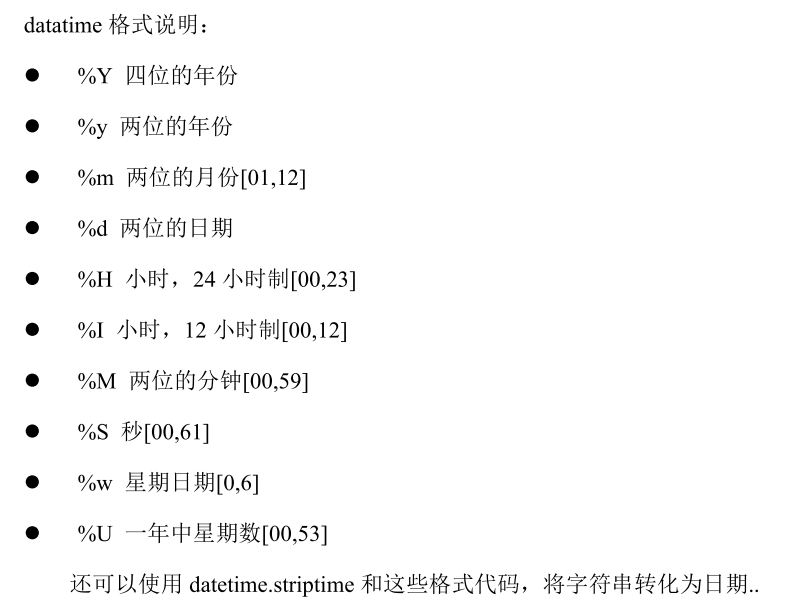

In [183]:
s = '2017/04-22' 
datetime.strptime(s, '%Y/%m-%d')
#将字符串转化为时间

datetime.datetime(2017, 4, 22, 0, 0)

In [184]:
datestrs=['7/6/2011','8/6/2011']
[datetime.strptime(x,'%m/%d/%Y')for x in datestrs]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

In [186]:
data1=pd.DataFrame([['one',1,2,3.,4,np.nan],
                    ['two',5,6,np.nan,8,'world'],
                    ['three',9,10,11.0,12,'foo']],
                   columns=['something','a','b','c','d','message'])
data1

,something,a,b,c,d,message
0,one,1,2,3.0,4,NaN
1,two,5,6,NaN,8,world
2,three,9,10,11.0,12,foo


In [189]:
#使用 DATAFrame 的 to_csv()方法，将数据导出为逗号分隔的文件 
data1.to_csv("C:\\Users\\Eumenides\\Desktop\\data1.csv",index=False)

In [194]:
#当然，其他的分隔符也是可以的（写入到 sys.stdout 时，控制台中打印的文本结果）：
import sys 
data1.to_csv(sys.stdout,sep='|')

|something|a|b|c|d|message
0|one|1|2|3.0|4|
1|two|5|6||8|world
2|three|9|10|11.0|12|foo


In [195]:
#缺失值在输出的时候以空字符串出现。如果需要用其他标识值对缺失值进行标注，如下：
data1.to_csv(sys.stdout,na_rep='NULL')

,something,a,b,c,d,message
0,one,1,2,3.0,4,NULL
1,two,5,6,NULL,8,world
2,three,9,10,11.0,12,foo


In [196]:
#如果没有其他选择被指定的话，行和列的标签都会被写入。不过二者也都可以禁止写入 
data1.to_csv(sys.stdout,na_rep='NULL',index=False,header=False)
#禁止行列标签写入

one,1,2,3.0,4,NULL
two,5,6,NULL,8,world
three,9,10,11.0,12,foo


In [197]:
#当然，还可以写入列的子集，并且按照规定的顺序写入 
data1.to_csv(sys.stdout,na_rep='NULL',index=False,columns=['a','b','c'])
#按照规定的顺序将 列的子集写入

a,b,c
1,2,3.0
5,6,NULL
9,10,11.0


In [198]:
dates=pd.date_range('1/1/2000',periods=7) 
#将时间 1/1/2000 重复 7 次 
dates

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07'],
              dtype='datetime64[ns]', freq='D')

In [199]:
ts=pd.Series(np.arange(7),index=dates)
ts

2000-01-01    0
2000-01-02    1
2000-01-03    2
2000-01-04    3
2000-01-05    4
2000-01-06    5
2000-01-07    6
Freq: D, dtype: int32

In [201]:
ts.to_csv("C:\\Users\\Eumenides\\Desktop\\tserise.csv")

D:\Anaconda\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [203]:
df1=pd.read_csv("C:\\Users\\Eumenides\\Desktop\\data1.csv") 
df1

,something,a,b,c,d,message
0,one,1,2,3.0,4,NaN
1,two,5,6,NaN,8,world
2,three,9,10,11.0,12,foo


In [206]:
pd.read_table("C:\\Users\\Eumenides\\Desktop\\data1.csv",sep=',') #使用 read.table 读取数据

D:\Anaconda\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead.
  """Entry point for launching an IPython kernel.


,something,a,b,c,d,message
0,one,1,2,3.0,4,NaN
1,two,5,6,NaN,8,world
2,three,9,10,11.0,12,foo


In [208]:
data2=pd.DataFrame([['one',1,2,3.,4,np.nan],
                    ['two',5,6,np.nan,8,'world'],
                    ['three',9,10,11.0,12,'foo']]) 
data2

,0,1,2,3,4,5
0,one,1,2,3.0,4,NaN
1,two,5,6,NaN,8,world
2,three,9,10,11.0,12,foo


In [209]:
data2.to_csv("C:\\Users\\Eumenides\\Desktop\\data2.csv",header=False,index=False)

In [212]:
pd.read_csv("C:\\Users\\Eumenides\\Desktop\\data2.csv",header=None)
#不读取列名

,0,1,2,3,4,5
0,one,1,2,3.0,4,NaN
1,two,5,6,NaN,8,world
2,three,9,10,11.0,12,foo


In [213]:
pd.read_csv("C:\\Users\\Eumenides\\Desktop\\data2.csv",names=['序号','a','b','c','d','e']) #自己指定列名

,序号,a,b,c,d,e
0,one,1,2,3.0,4,NaN
1,two,5,6,NaN,8,world
2,three,9,10,11.0,12,foo


In [215]:
#假设想要message列称为犯规DataFrame的索引，可以指定位置4的列为索引或者
#将‘e’传给参数index_col 
names=['序号','a','b','c','d','e'] 
pd.read_csv("C:\\Users\\Eumenides\\Desktop\\data2.csv",names=names,index_col='e')
#将e列作为index

,序号,a,b,c,d
e,,,,,
NaN,one,1,2,3.0,4
world,two,5,6,NaN,8
foo,three,9,10,11.0,12
